In [6]:
#https://github.com/Prakashvanapalli/TensorFlow/blob/master/Blogposts/Backpropogation_with_Images.ipynb
import numpy as np
from numpy import ma
#initialize variables / network
input1= np.array([0.1,0.2,0.7])
output = np.array([1.0,0.0,0.0])
wij =np.random.random((3,3))
wjk =np.random.random((3,3))
wkl =np.random.random((3,3))
#learning rate
lr = 0.001
epoch = 40000
Error_list = []
j=2500.0
k =1


for i in range(epoch):
    #layer1 h1 with relu function
    h1_in = np.dot(input1, wij)
    h1_out = np.maximum(h1_in,0,h1_in) #relu

    #layer2 h2 with sigmoid function
    h2_in = np.dot(h1_out , wjk)
    h2_out = 1/(1+np.exp(-h2_in))

    #output
    O_in = np.dot(h2_out , wkl)
    O_out =  np.exp(O_in)/np.sum(np.exp(O_in))

    #Cross entropy / error
    Error = -np.sum(output * ma.filled(ma.log(O_out),0) + (1-output) * ma.filled(ma.log(1-output),0))
    Error_list.append(Error)
#     if i/j == k:
#         lr = lr/2.0
#         k +=1
    

    #back propogation
    #Error layer
    dE_of_O_out = -1*(output *(1/(O_out)) + (1-output)*(ma.filled(1/(1-O_out),0)))

    #calculate the derivative of each output with respect to each input
    dO_out_of_O_in =  (np.exp(O_in) * (np.sum(np.exp(O_in)) - np.exp(O_in))) /np.square(np.sum(np.exp(O_in)))
    dO_in_of_wkl = np.tile(h2_out,(3,1)).T

    #now calculate the change in wkl with respective to Error using chain rule
    dE_of_wkl = dE_of_O_out * dO_out_of_O_in * dO_in_of_wkl

    # h2_out is  - 1/(1+np.exp(-h2_in))
    dh2_out_of_h2_in = h2_out * (1- h2_out)
    dh2_in_of_wjk = np.tile(h1_out,(3,1)).T

    #now calculate the change in wjk  with respective to Error using chain rule
    dE_of_wjk  = dE_of_O_out * dO_out_of_O_in * dh2_in_of_wjk * dh2_out_of_h2_in 

    #relu layer
    temp = h1_in
    temp[temp>0] = 1
    temp[temp<=0 ] =0
    dh1_out_of_h1_in =temp 

    dh1_in_of_wij = np.tile(input1,(3,1)).T

    dE_of_wij = dE_of_O_out * dO_out_of_O_in * dh2_out_of_h2_in * dh1_out_of_h1_in * dh1_in_of_wij

    #update weights
    wkl = wkl -(lr * dE_of_wkl)
    wjk = wjk -(lr * dE_of_wjk)
    wij = wij -(lr * dE_of_wij)


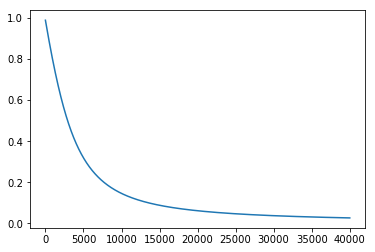

In [7]:
from matplotlib import pyplot as plt
plt.plot(Error_list)
plt.show()

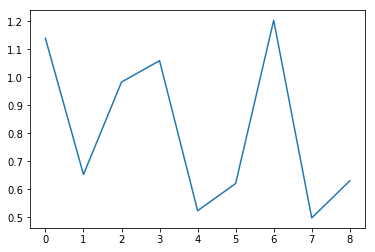

In [12]:
plt.plot(wjk.ravel())
plt.show()

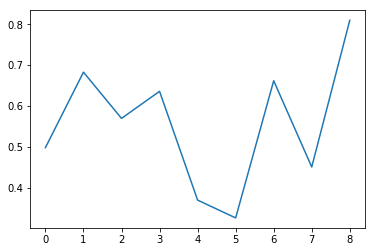

In [13]:
plt.plot(wij.ravel())
plt.show()

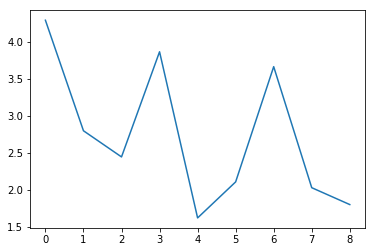

In [14]:
plt.plot(wkl.ravel())
plt.show()

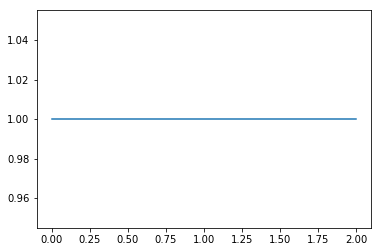

In [15]:
plt.plot(h1_out)
plt.show()

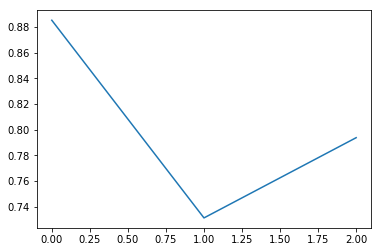

In [16]:
plt.plot(h2_out)
plt.show()

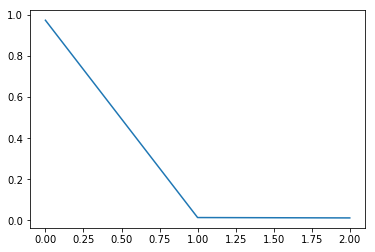

In [17]:
plt.plot(O_out)
plt.show()